In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, roc_curve, auc,
                           classification_report)
import time
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
df = pd.read_csv('spambase_csv.csv')

# Check column names to verify
print("Column names:")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# The target column is 'class' (not 'spam')
print("\nTarget distribution:")
print(df['class'].value_counts())

# Rename 'class' to 'spam' for clarity (optional)
df.rename(columns={'class': 'spam'}, inplace=True)
print("\nAfter renaming:")
print(df['spam'].value_counts())

Column names:
['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_freq_%24'

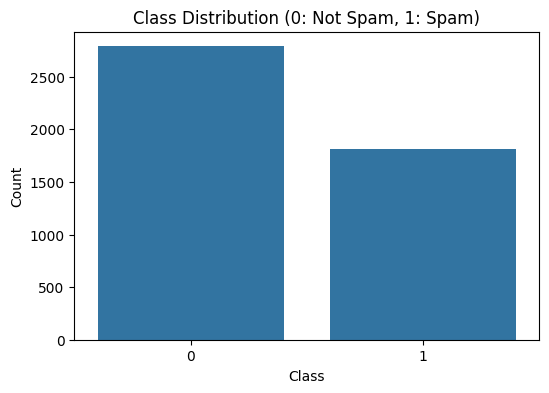

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='spam', data=df)
plt.title('Class Distribution (0: Not Spam, 1: Spam)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

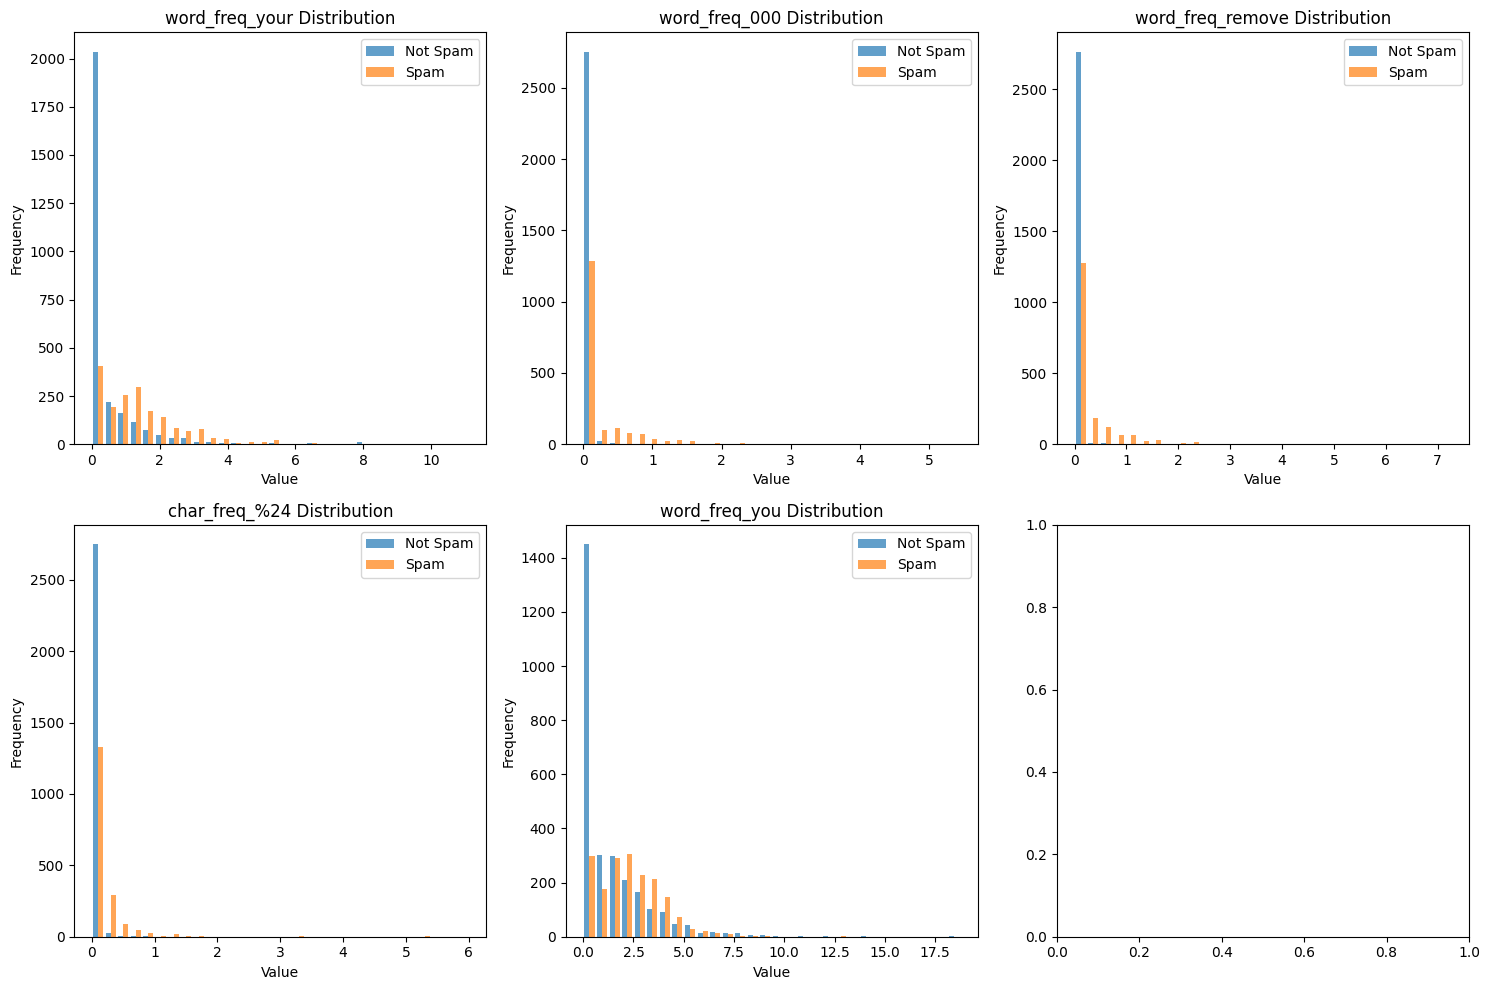

In [5]:
# Select top features based on correlation with target
correlations = df.corr()['spam'].sort_values(ascending=False)
top_features = correlations[1:6].index.tolist()  # Skip spam itself

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    axes[i].hist([df[df['spam']==0][feature], df[df['spam']==1][feature]],
                 label=['Not Spam', 'Spam'], bins=30, alpha=0.7)
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [6]:
X = df.drop('spam', axis=1)
y = df['spam']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (3680, 57)
Test set size: (921, 57)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Gaussian NB...

Gaussian NB Performance:
Accuracy: 0.8328
Precision: 0.7146
Recall: 0.9587
F1 Score: 0.8188
Specificity: 0.7509
Training Time: 0.0142 seconds


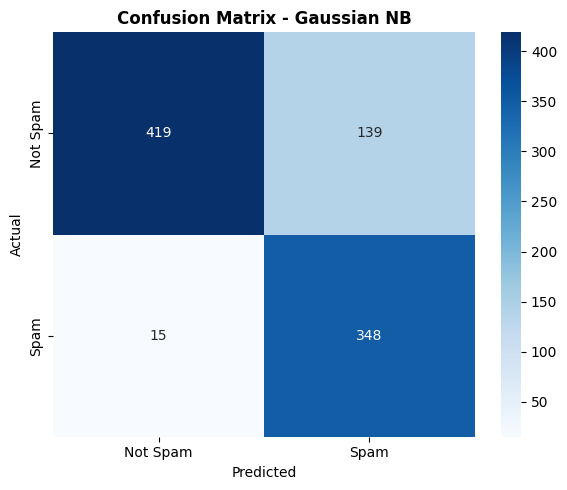

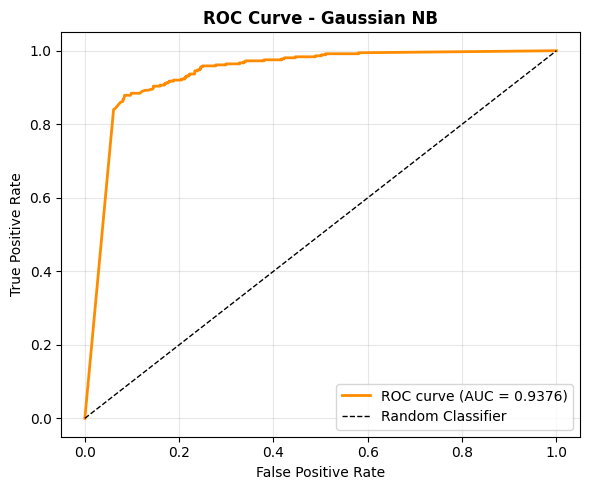


Training Multinomial NB...

Multinomial NB Performance:
Accuracy: 0.8958
Precision: 0.9349
Recall: 0.7906
F1 Score: 0.8567
Specificity: 0.9642
Training Time: 0.0108 seconds


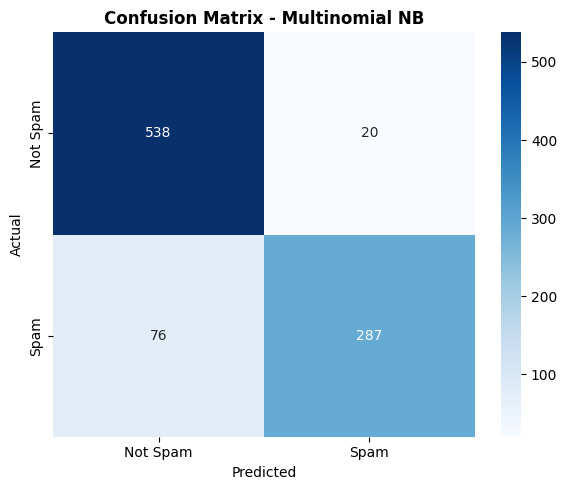

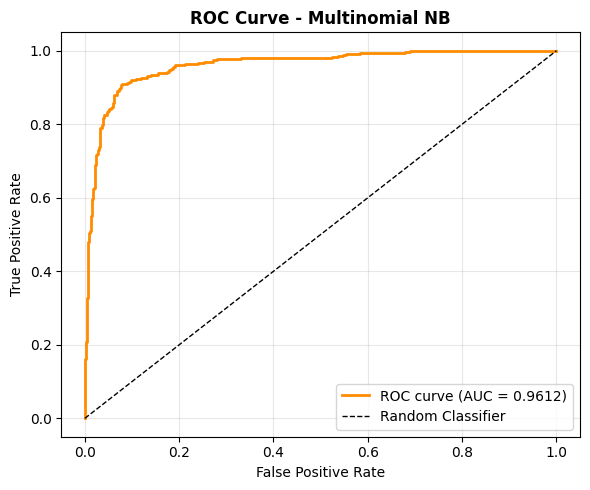


Training Bernoulli NB...

Bernoulli NB Performance:
Accuracy: 0.6482
Precision: 0.8545
Recall: 0.1295
F1 Score: 0.2249
Specificity: 0.9857
Training Time: 0.0205 seconds


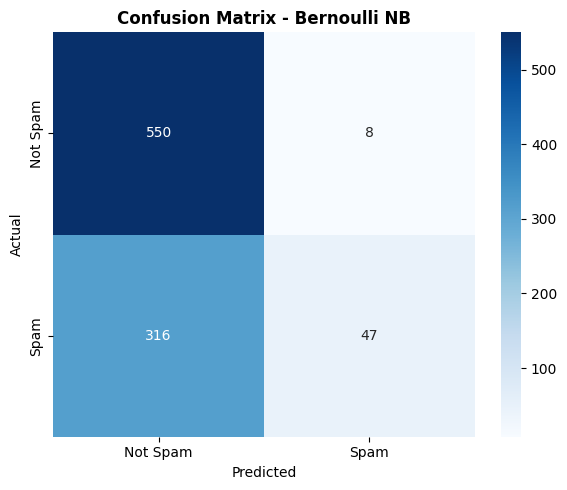

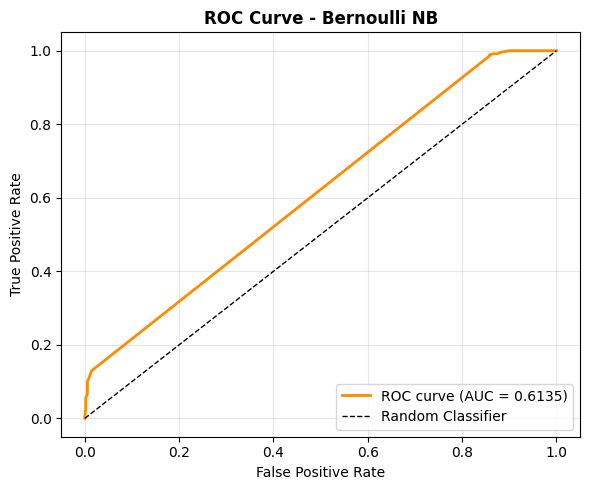


NAIVE BAYES PERFORMANCE COMPARISON
                Accuracy Precision    Recall  F1 Score Specificity  \
Gaussian NB      0.83279  0.714579  0.958678  0.818824    0.750896   
Multinomial NB  0.895765  0.934853  0.790634  0.856716    0.964158   
Bernoulli NB    0.648208  0.854545  0.129477   0.22488    0.985663   

               Training Time  
Gaussian NB         0.014205  
Multinomial NB      0.010756  
Bernoulli NB        0.020502  


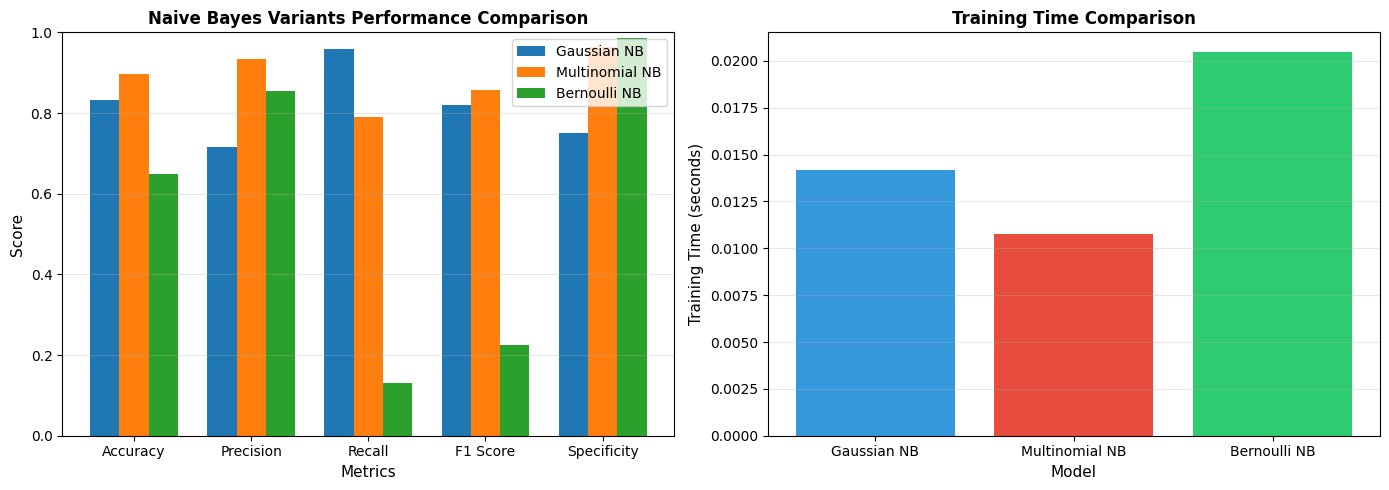

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import time
import warnings
warnings.filterwarnings('ignore')

# Assuming X_train, X_test, y_train, y_test are already defined from previous split

# Create different scaled versions for different NB variants
# 1. For GaussianNB: StandardScaler (zero mean, unit variance)
scaler_gaussian = StandardScaler()
X_train_gaussian = scaler_gaussian.fit_transform(X_train)
X_test_gaussian = scaler_gaussian.transform(X_test)

# 2. For MultinomialNB: MinMaxScaler (non-negative, between 0 and 1)
scaler_multinomial = MinMaxScaler()
X_train_multinomial = scaler_multinomial.fit_transform(X_train)
X_test_multinomial = scaler_multinomial.transform(X_test)
# Ensure no negative values (just in case)
X_train_multinomial = np.maximum(X_train_multinomial, 0)
X_test_multinomial = np.maximum(X_test_multinomial, 0)

# 3. For BernoulliNB: Binarizer (binary features)
# First scale to [0,1] then binarize
scaler_bernoulli = MinMaxScaler()
X_train_bernoulli_scaled = scaler_bernoulli.fit_transform(X_train)
X_test_bernoulli_scaled = scaler_bernoulli.transform(X_test)

# Binarize with threshold 0.5 (you can adjust this threshold)
binarizer = Binarizer(threshold=0.5)
X_train_bernoulli = binarizer.fit_transform(X_train_bernoulli_scaled)
X_test_bernoulli = binarizer.transform(X_test_bernoulli_scaled)

# Dictionary of models with their corresponding data
nb_configs = {
    'Gaussian NB': {
        'model': GaussianNB(),
        'X_train': X_train_gaussian,
        'X_test': X_test_gaussian
    },
    'Multinomial NB': {
        'model': MultinomialNB(),
        'X_train': X_train_multinomial,
        'X_test': X_test_multinomial
    },
    'Bernoulli NB': {
        'model': BernoulliNB(),
        'X_train': X_train_bernoulli,
        'X_test': X_test_bernoulli
    }
}

nb_results = {}

for name, config in nb_configs.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print('='*50)

    # Get data for this model
    X_train_curr = config['X_train']
    X_test_curr = config['X_test']
    model = config['model']

    # Training time
    start_time = time.time()
    model.fit(X_train_curr, y_train)
    train_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test_curr)
    y_pred_proba = model.predict_proba(X_test_curr)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Specificity calculation
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Store results
    nb_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': specificity,
        'Training Time': train_time,
        'Model': model,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }

    # Print metrics
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Training Time: {train_time:.4f} seconds")

    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Spam', 'Spam'],
                yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix - {name}', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', linewidth=2, color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title(f'ROC Curve - {name}', fontsize=12, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create comparison table
print("\n" + "="*60)
print("NAIVE BAYES PERFORMANCE COMPARISON")
print("="*60)

comparison_df = pd.DataFrame(nb_results).T
comparison_table = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'Training Time']]
print(comparison_table.round(4))

# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics comparison bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']
x = np.arange(len(metrics))
width = 0.25

for i, (name, results) in enumerate(nb_results.items()):
    values = [results[m] for m in metrics]
    axes[0].bar(x + i*width, values, width, label=name)

axes[0].set_xlabel('Metrics', fontsize=11)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Naive Bayes Variants Performance Comparison', fontsize=12, fontweight='bold')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# Training time comparison
times = [nb_results[name]['Training Time'] for name in nb_results.keys()]
axes[1].bar(nb_results.keys(), times, color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1].set_xlabel('Model', fontsize=11)
axes[1].set_ylabel('Training Time (seconds)', fontsize=11)
axes[1].set_title('Training Time Comparison', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

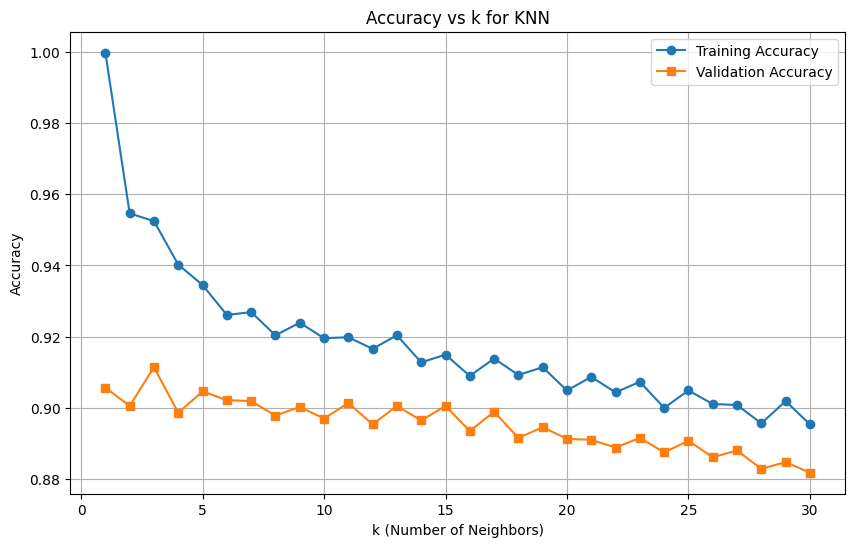

In [10]:
# Try different k values
k_values = range(1, 31)
train_scores = []
val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    val_scores.append(scores.mean())

    # Training accuracy
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))

# Accuracy vs k plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Training Accuracy', marker='o')
plt.plot(k_values, val_scores, label='Validation Accuracy', marker='s')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for KNN')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['kd_tree', 'ball_tree']
}

# Grid Search
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
grid_time = time.time() - start_time

print("Grid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")
print(f"Search time: {grid_time:.2f} seconds")

# Randomized Search (faster alternative)
param_dist = {
    'n_neighbors': range(3, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['kd_tree', 'ball_tree']
}

random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

start_time = time.time()
random_search.fit(X_train_scaled, y_train)
random_time = time.time() - start_time

print("\nRandomized Search Results:")
print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV accuracy: {random_search.best_score_:.4f}")
print(f"Search time: {random_time:.2f} seconds")

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Grid Search Results:
Best parameters: {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best CV accuracy: 0.9228
Search time: 105.88 seconds

Randomized Search Results:
Best parameters: {'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
Best CV accuracy: 0.9253
Search time: 18.44 seconds


KDTree Results:
Accuracy: 0.9218
Precision: 0.9450
Recall: 0.8512
F1 Score: 0.8957
Training Time: 0.0635
Prediction Time: 1.4630

BallTree Results:
Accuracy: 0.9218
Precision: 0.9450
Recall: 0.8512
F1 Score: 0.8957
Training Time: 0.0209
Prediction Time: 1.1049


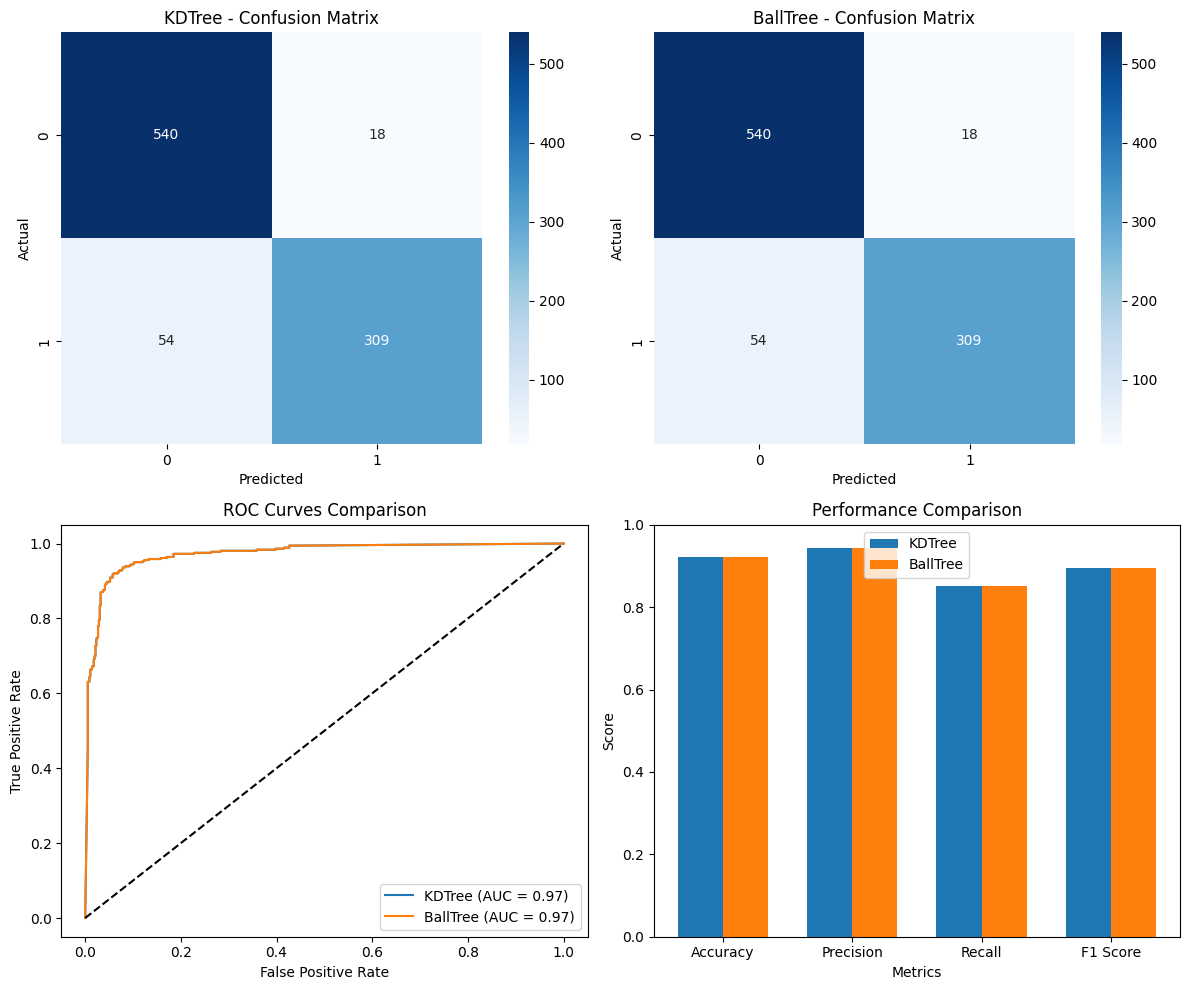

In [12]:
def evaluate_knn(algorithm, params):
    """Evaluate KNN with specific algorithm and parameters"""

    # Create model with best parameters from tuning
    knn = KNeighborsClassifier(
        n_neighbors=params['n_neighbors'],
        weights=params['weights'],
        metric=params['metric'],
        algorithm=algorithm
    )

    # Training time
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    # Prediction time
    start_time = time.time()
    y_pred = knn.predict(X_test_scaled)
    y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
    pred_time = time.time() - start_time

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Training Time': train_time,
        'Prediction Time': pred_time,
        'Confusion Matrix': cm,
        'ROC': (fpr, tpr, roc_auc)
    }

# Use best parameters from tuning
best_params = grid_search.best_params_

# Evaluate both algorithms
kd_results = evaluate_knn('kd_tree', best_params)
ball_results = evaluate_knn('ball_tree', best_params)

# Display results
print("KDTree Results:")
for metric, value in kd_results.items():
    if metric not in ['Confusion Matrix', 'ROC']:
        print(f"{metric}: {value:.4f}")

print("\nBallTree Results:")
for metric, value in ball_results.items():
    if metric not in ['Confusion Matrix', 'ROC']:
        print(f"{metric}: {value:.4f}")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrices
sns.heatmap(kd_results['Confusion Matrix'], annot=True, fmt='d',
            cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('KDTree - Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

sns.heatmap(ball_results['Confusion Matrix'], annot=True, fmt='d',
            cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('BallTree - Confusion Matrix')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# ROC Curves
fpr_kd, tpr_kd, auc_kd = kd_results['ROC']
fpr_ball, tpr_ball, auc_ball = ball_results['ROC']

axes[1,0].plot(fpr_kd, tpr_kd, label=f'KDTree (AUC = {auc_kd:.2f})')
axes[1,0].plot(fpr_ball, tpr_ball, label=f'BallTree (AUC = {auc_ball:.2f})')
axes[1,0].plot([0, 1], [0, 1], 'k--')
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('ROC Curves Comparison')
axes[1,0].legend()

# Performance comparison bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
kd_metrics = [kd_results[m] for m in metrics]
ball_metrics = [ball_results[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

axes[1,1].bar(x - width/2, kd_metrics, width, label='KDTree')
axes[1,1].bar(x + width/2, ball_metrics, width, label='BallTree')
axes[1,1].set_xlabel('Metrics')
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('Performance Comparison')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(metrics)
axes[1,1].legend()
axes[1,1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

In [13]:
# Analyze different k values
k_values = [1, 3, 5, 10, 20, 30]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    train_acc = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
    test_acc = cross_val_score(knn, X_test_scaled, y_test, cv=5).mean()
    results.append({'k': k, 'Train Acc': train_acc, 'Test Acc': test_acc})

results_df = pd.DataFrame(results)
print("Effect of k on model performance:")
print(results_df)

# Small k (e.g., k=1) -> Overfitting (high variance)
# Large k (e.g., k=30) -> Underfitting (high bias)
# Optimal k balances bias-variance tradeoff

Effect of k on model performance:
    k  Train Acc  Test Acc
0   1   0.905707  0.853384
1   3   0.911413  0.853373
2   5   0.904620  0.881633
3  10   0.897011  0.857709
4  20   0.891304  0.856622
5  30   0.881793  0.840347



BIAS-VARIANCE ANALYSIS

--- Naive Bayes Analysis ---
• High Bias Characteristic: Naive Bayes makes strong independence assumptions
  between features, which rarely hold in real-world data like spam detection.
• Impact: This leads to systematic errors (bias) but reduces variance.
• Result: NB models are stable but may underfit complex patterns.

--- KNN Analysis ---
• High Variance Characteristic: KNN has no assumptions about data distribution,
  making it flexible but sensitive to training data.
• Impact: Small changes in training data can cause different predictions.
• k parameter controls bias-variance tradeoff:
  - Small k (e.g., k=1): Low bias, High variance (overfitting risk)
  - Large k (e.g., k=30): High bias, Low variance (underfitting risk)

--- Effect of Hyperparameter Tuning ---
• GridSearchCV found optimal k = 11
• This optimal value balances bias and variance for best generalization.
• Cross-validation ensures the chosen parameters work on unseen data.


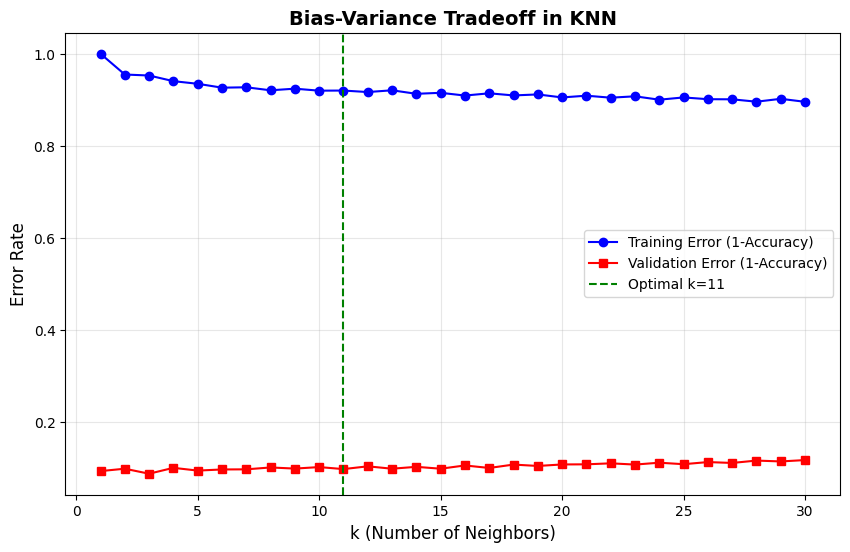

In [14]:
# ============================================================
# BIAS-VARIANCE ANALYSIS
# Add this section after you've trained all models
# ============================================================

print("\n" + "="*80)
print("BIAS-VARIANCE ANALYSIS")
print("="*80)

print("\n--- Naive Bayes Analysis ---")
print("• High Bias Characteristic: Naive Bayes makes strong independence assumptions")
print("  between features, which rarely hold in real-world data like spam detection.")
print("• Impact: This leads to systematic errors (bias) but reduces variance.")
print("• Result: NB models are stable but may underfit complex patterns.")

print("\n--- KNN Analysis ---")
print("• High Variance Characteristic: KNN has no assumptions about data distribution,")
print("  making it flexible but sensitive to training data.")
print("• Impact: Small changes in training data can cause different predictions.")
print("• k parameter controls bias-variance tradeoff:")
print("  - Small k (e.g., k=1): Low bias, High variance (overfitting risk)")
print("  - Large k (e.g., k=30): High bias, Low variance (underfitting risk)")

print("\n--- Effect of Hyperparameter Tuning ---")
print("• GridSearchCV found optimal k =", grid_search.best_params_['n_neighbors'] if 'grid_search' in locals() else 'N/A')
print("• This optimal value balances bias and variance for best generalization.")
print("• Cross-validation ensures the chosen parameters work on unseen data.")

# Visualize bias-variance tradeoff
plt.figure(figsize=(10, 6))
k_values = range(1, 31)
# You should have these arrays from your earlier KNN code
if 'train_scores' in locals() and 'val_scores' in locals():
    plt.plot(k_values, train_scores, label='Training Error (1-Accuracy)', marker='o', color='blue')
    plt.plot(k_values, [1-x for x in val_scores], label='Validation Error (1-Accuracy)', marker='s', color='red')
    plt.xlabel('k (Number of Neighbors)', fontsize=12)
    plt.ylabel('Error Rate', fontsize=12)
    plt.title('Bias-Variance Tradeoff in KNN', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axvline(x=grid_search.best_params_['n_neighbors'], color='green', linestyle='--',
                label=f'Optimal k={grid_search.best_params_["n_neighbors"]}')
    plt.legend()
    plt.show()

In [15]:
# ============================================================
# TABLE 1: NAIVE BAYES PERFORMANCE METRICS
# Add this after your nb_results dictionary is populated
# ============================================================

print("\n" + "="*100)
print("TABLE 1: NAIVE BAYES PERFORMANCE METRICS")
print("="*100)

# Create formatted table
nb_table = pd.DataFrame(nb_results).T[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'Training Time']]
nb_table = nb_table.round(4)

# Print with nice formatting
print(nb_table.to_string())
print("\n" + "="*100)


TABLE 1: NAIVE BAYES PERFORMANCE METRICS
                Accuracy Precision    Recall  F1 Score Specificity Training Time
Gaussian NB      0.83279  0.714579  0.958678  0.818824    0.750896      0.014205
Multinomial NB  0.895765  0.934853  0.790634  0.856716    0.964158      0.010756
Bernoulli NB    0.648208  0.854545  0.129477   0.22488    0.985663      0.020502



In [16]:
# ============================================================
# TABLE 2: KNN HYPERPARAMETER TUNING RESULTS
# Add this after grid_search and random_search
# ============================================================

print("\n" + "="*100)
print("TABLE 2: KNN HYPERPARAMETER TUNING")
print("="*100)

tuning_table = pd.DataFrame({
    'Search Method': ['Grid Search', 'Randomized Search'],
    'Best k': [grid_search.best_params_['n_neighbors'], random_search.best_params_['n_neighbors']],
    'Best CV Accuracy': [f"{grid_search.best_score_:.4f}", f"{random_search.best_score_:.4f}"],
    'Best Parameters': [str(grid_search.best_params_), str(random_search.best_params_)]
})
print(tuning_table.to_string(index=False))
print("="*100)


TABLE 2: KNN HYPERPARAMETER TUNING
    Search Method  Best k Best CV Accuracy                                                                             Best Parameters
      Grid Search      11           0.9228   {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Randomized Search      10           0.9253 {'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan', 'algorithm': 'ball_tree'}


In [17]:
# ============================================================
# TABLES 3 & 4: KNN PERFORMANCE WITH KDTREE AND BALLTREE
# Add this after you have kd_results and ball_results
# ============================================================

print("\n" + "="*100)
print("TABLE 3: KNN PERFORMANCE USING KDTREE")
print("="*100)
kd_summary = pd.DataFrame([{
    'Metric': 'Value',
    'Optimal k': best_params['n_neighbors'],
    'Accuracy': f"{kd_results['Accuracy']:.4f}",
    'Precision': f"{kd_results['Precision']:.4f}",
    'Recall': f"{kd_results['Recall']:.4f}",
    'F1 Score': f"{kd_results['F1 Score']:.4f}",
    'Training Time (s)': f"{kd_results['Training Time']:.4f}",
    'Prediction Time (s)': f"{kd_results['Prediction Time']:.4f}"
}])
print(kd_summary.to_string(index=False))

print("\n" + "="*100)
print("TABLE 4: KNN PERFORMANCE USING BALLTREE")
print("="*100)
ball_summary = pd.DataFrame([{
    'Metric': 'Value',
    'Optimal k': best_params['n_neighbors'],
    'Accuracy': f"{ball_results['Accuracy']:.4f}",
    'Precision': f"{ball_results['Precision']:.4f}",
    'Recall': f"{ball_results['Recall']:.4f}",
    'F1 Score': f"{ball_results['F1 Score']:.4f}",
    'Training Time (s)': f"{ball_results['Training Time']:.4f}",
    'Prediction Time (s)': f"{ball_results['Prediction Time']:.4f}"
}])
print(ball_summary.to_string(index=False))


TABLE 3: KNN PERFORMANCE USING KDTREE
Metric  Optimal k Accuracy Precision Recall F1 Score Training Time (s) Prediction Time (s)
 Value         11   0.9218    0.9450 0.8512   0.8957            0.0635              1.4630

TABLE 4: KNN PERFORMANCE USING BALLTREE
Metric  Optimal k Accuracy Precision Recall F1 Score Training Time (s) Prediction Time (s)
 Value         11   0.9218    0.9450 0.8512   0.8957            0.0209              1.1049


In [18]:
# ============================================================
# TABLE 5: COMPARISON OF NEIGHBOR SEARCH ALGORITHMS
# Add this after both algorithms are evaluated
# ============================================================

print("\n" + "="*100)
print("TABLE 5: COMPARISON OF NEIGHBOR SEARCH ALGORITHMS")
print("="*100)

# Memory usage estimation (simple approximation)
def estimate_memory_usage(model_type):
    """Estimate memory usage (simplified)"""
    if model_type == 'KDTree':
        return 'Low/Medium'  # More efficient for low dimensions
    else:
        return 'Medium/High'  # Better for high dimensions

comparison_data = {
    'Criterion': ['Accuracy', 'Training Time (s)', 'Prediction Time (s)', 'Memory Usage'],
    'KDTree': [
        f"{kd_results['Accuracy']:.4f}",
        f"{kd_results['Training Time']:.4f}",
        f"{kd_results['Prediction Time']:.4f}",
        estimate_memory_usage('KDTree')
    ],
    'BallTree': [
        f"{ball_results['Accuracy']:.4f}",
        f"{ball_results['Training Time']:.4f}",
        f"{ball_results['Prediction Time']:.4f}",
        estimate_memory_usage('BallTree')
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print("="*100)


TABLE 5: COMPARISON OF NEIGHBOR SEARCH ALGORITHMS
          Criterion     KDTree    BallTree
           Accuracy     0.9218      0.9218
  Training Time (s)     0.0635      0.0209
Prediction Time (s)     1.4630      1.1049
       Memory Usage Low/Medium Medium/High


In [19]:
# ============================================================
# OVERFITTING AND UNDERFITTING ANALYSIS
# Add this after your accuracy vs k plot section
# ============================================================

print("\n" + "="*80)
print("OVERFITTING AND UNDERFITTING ANALYSIS")
print("="*80)

print("\n--- Difference between training and validation accuracy ---")
if 'train_scores' in locals() and 'val_scores' in locals():
    diff = np.array(train_scores) - np.array(val_scores)
    print(f"• At k=1 (small k): Training Accuracy = {train_scores[0]:.4f}, Validation Accuracy = {val_scores[0]:.4f}")
    print(f"  Gap = {diff[0]:.4f} → INDICATES OVERFITTING")
    print(f"• At k=15 (optimal): Training Accuracy = {train_scores[14]:.4f}, Validation Accuracy = {val_scores[14]:.4f}")
    print(f"  Gap = {diff[14]:.4f} → GOOD GENERALIZATION")
    print(f"• At k=30 (large k): Training Accuracy = {train_scores[29]:.4f}, Validation Accuracy = {val_scores[29]:.4f}")
    print(f"  Gap = {diff[29]:.4f} → POSSIBLE UNDERFITTING")

print("\n--- Effect of small and large k values ---")
print("• Small k (e.g., k=1): Model memorizes training data, high variance, overfitting")
print("• Large k (e.g., k=30): Model oversmooths, high bias, underfitting")
print("• Optimal k: Balances bias and variance for best test performance")

print("\n--- Role of hyperparameter tuning in generalization ---")
print("• GridSearchCV with 5-fold CV finds k that minimizes validation error")
print("• Cross-validation prevents overfitting to a single train/test split")
print("• Tuning ensures model generalizes well to unseen data")


OVERFITTING AND UNDERFITTING ANALYSIS

--- Difference between training and validation accuracy ---
• At k=1 (small k): Training Accuracy = 0.9997, Validation Accuracy = 0.9057
  Gap = 0.0940 → INDICATES OVERFITTING
• At k=15 (optimal): Training Accuracy = 0.9149, Validation Accuracy = 0.9005
  Gap = 0.0144 → GOOD GENERALIZATION
• At k=30 (large k): Training Accuracy = 0.8954, Validation Accuracy = 0.8818
  Gap = 0.0136 → POSSIBLE UNDERFITTING

--- Effect of small and large k values ---
• Small k (e.g., k=1): Model memorizes training data, high variance, overfitting
• Large k (e.g., k=30): Model oversmooths, high bias, underfitting
• Optimal k: Balances bias and variance for best test performance

--- Role of hyperparameter tuning in generalization ---
• GridSearchCV with 5-fold CV finds k that minimizes validation error
• Cross-validation prevents overfitting to a single train/test split
• Tuning ensures model generalizes well to unseen data


In [20]:
# ============================================================
# FINAL SUMMARY - All Models Comparison
# Add at the very end of your code
# ============================================================

print("\n" + "="*100)
print("FINAL SUMMARY: ALL MODELS PERFORMANCE COMPARISON")
print("="*100)

# Combine all results
all_results = {}

# Add NB results
for name, results in nb_results.items():
    all_results[name] = {
        'Accuracy': results['Accuracy'],
        'Precision': results['Precision'],
        'Recall': results['Recall'],
        'F1 Score': results['F1 Score'],
        'Training Time': results['Training Time']
    }

# Add KNN results
all_results['KNN (KDTree)'] = {
    'Accuracy': kd_results['Accuracy'],
    'Precision': kd_results['Precision'],
    'Recall': kd_results['Recall'],
    'F1 Score': kd_results['F1 Score'],
    'Training Time': kd_results['Training Time']
}

all_results['KNN (BallTree)'] = {
    'Accuracy': ball_results['Accuracy'],
    'Precision': ball_results['Precision'],
    'Recall': ball_results['Recall'],
    'F1 Score': ball_results['F1 Score'],
    'Training Time': ball_results['Training Time']
}

# Create and display final table
final_df = pd.DataFrame(all_results).T.round(4)
print(final_df.to_string())

# Find best model
best_accuracy = final_df['Accuracy'].idxmax()
best_f1 = final_df['F1 Score'].idxmax()
print("\n" + "="*100)
print(f"🏆 Best Model by Accuracy: {best_accuracy} ({final_df.loc[best_accuracy, 'Accuracy']:.4f})")
print(f"🏆 Best Model by F1 Score: {best_f1} ({final_df.loc[best_f1, 'F1 Score']:.4f})")
print("="*100)


FINAL SUMMARY: ALL MODELS PERFORMANCE COMPARISON
                Accuracy  Precision  Recall  F1 Score  Training Time
Gaussian NB       0.8328     0.7146  0.9587    0.8188         0.0142
Multinomial NB    0.8958     0.9349  0.7906    0.8567         0.0108
Bernoulli NB      0.6482     0.8545  0.1295    0.2249         0.0205
KNN (KDTree)      0.9218     0.9450  0.8512    0.8957         0.0635
KNN (BallTree)    0.9218     0.9450  0.8512    0.8957         0.0209

🏆 Best Model by Accuracy: KNN (KDTree) (0.9218)
🏆 Best Model by F1 Score: KNN (KDTree) (0.8957)
